In [112]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [113]:
df=pd.read_excel("C:/Users/Gautham/OneDrive/Desktop/ML/DS - Assignment Part 1 data set.xlsx")
#We need to Round off the date first
df['Transaction date']=df['Transaction date'].round(decimals=0)
# df=df.rename(columns={"House price of unit area":"House_price"},inplace=True)

In [114]:
#First we will check for missing values
missing_count=(df.isnull().sum()/len(df))*100
#Filter to find the missing count >0
missing_count=missing_count[missing_count>0]
missing_count

Series([], dtype: float64)

There are no Missing Values

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

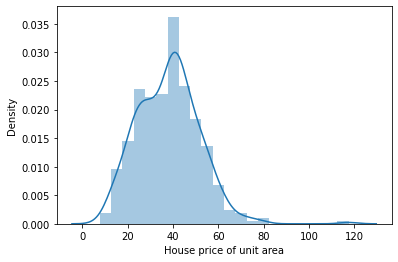

In [115]:
sns.distplot(df['House price of unit area'])

In [116]:
df.rename(columns={"House price of unit area":"House_price"},inplace=True)


Machine learning algorithms works well with the data which are normally distributed and our data seems to be slightly skewed to right so we will try to fix this by removing the data above 90

In [117]:
filter=df[df.House_price <=90]
filter

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House_price
0,2013.00,32.00,84.88,10,24.98,121.54,1,575,37.90
1,2013.00,19.50,306.59,9,24.98,121.54,2,1240,42.20
2,2014.00,13.30,561.98,5,24.99,121.54,3,1060,47.30
3,2014.00,13.30,561.98,5,24.99,121.54,2,875,54.80
4,2013.00,5.00,390.57,5,24.98,121.54,1,491,43.10
...,...,...,...,...,...,...,...,...,...
409,2013.00,13.70,4082.01,0,24.94,121.50,3,803,15.40
410,2013.00,5.60,90.46,9,24.97,121.54,2,1278,50.00
411,2013.00,18.80,390.97,7,24.98,121.54,1,503,40.60
412,2013.00,8.10,104.81,5,24.97,121.54,1,597,52.50


<AxesSubplot:xlabel='House_price', ylabel='Density'>

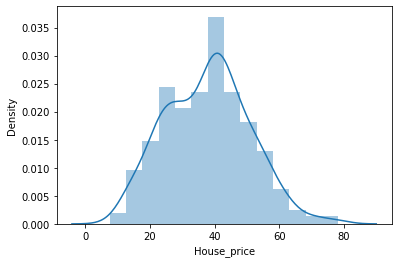

In [118]:
sns.distplot(filter['House_price'])

Now our data seems to look normally distributed

<AxesSubplot:>

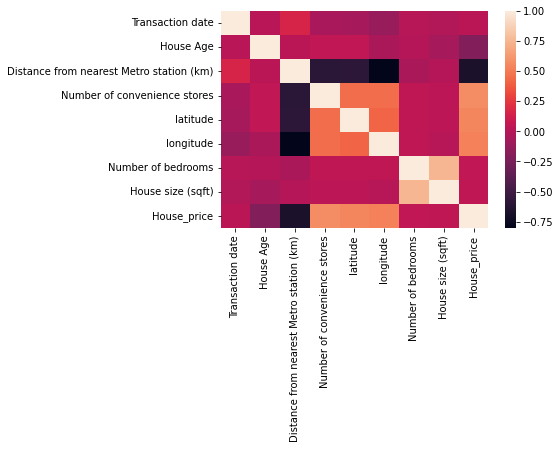

In [119]:
#Correlation plot of the features
corr=df.corr()
sns.heatmap(corr)

In [120]:
#Splitting the dataset
x = filter.drop("House_price",axis=1)
y = filter["House_price"]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3,test_size=0.25)

In [122]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 23.50it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.74       0.76  6.82        0.08
RandomForestRegressor                        0.73       0.75  6.87        0.11
AdaBoostRegressor                            0.73       0.75  6.95        0.06
GradientBoostingRegressor                    0.72       0.75  6.97        0.05
LGBMRegressor                                0.72       0.74  7.00        0.04
HistGradientBoostingRegressor                0.72       0.74  7.08        0.09
BaggingRegressor                             0.71       0.73  7.15        0.01
XGBRegressor                                 0.65       0.68  7.82        0.05
KNeighborsRegressor                          0.61       0.64  8.32        0.02
PoissonRegressor                             0.60       0.63  8.36        0.01
OrthogonalMatchingPursuitCV                  0.56   

## As ExtraTreesRegressor has highest R-squared value of 76% we will go for it.

In [123]:
import joblib
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
joblib.dump(reg,"ExtraTreesRegressor")

['ExtraTreesRegressor']

In [124]:
loaded_model = joblib.load("ExtraTreesRegressor")

In [125]:
def predictions(Transaction_date,House_Age,nearest_metro_dist,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size,model):
    return model.predict([[Transaction_date,House_Age,nearest_metro_dist,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size]])[0]

In [126]:
predictions(2013.00,32.00,84.88,10,24.98,121.54,1,575,loaded_model)

39.65100000000003

# Thus our model is predicting House prices pretty accurately using Extra tree Regression.